In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [112]:
# 4.2.1 

years = [2014, 2015, 2016, 2017, 2018] 
member_status = ['bronze', 'silver', 'gold', 'inactive']

member_years = np.random.choice(years, 1000, p=[0.1, 0.1, 0.15, 0.3, 0.35])
member_stats = np.random.choice(member_status, 1000, p=[0.5, 0.3, 0.1, 0.1])

year_joined = pd.DataFrame({
    'year_joined': member_years,
    'member_stats': member_stats
})

In [113]:
year_joined.head()

,year_joined,member_stats
0,2016,gold
1,2018,silver
2,2017,silver
3,2016,bronze
4,2016,bronze


In [114]:
NUM_EMAILS_SENT_WEEKLY = 3

# 한번도 열람하지 않은 회원
def never_opens(period_rng):
    return list()

# 같은 양을 열람하는 회원
def constant_open_rate(period_rng):
    n, p = NUM_EMAILS_SENT_WEEKLY, np.random.uniform(0, 1)
    num_opened = np.random.binomial(n, p, len(period_rng))
    
    return num_opened

# 열람하는 양이 늘어나는 회원
def increasing_open_rate(period_rng): 
    return open_rate_with_factor_change(period_rng, np. random.uniform(1.01, 1.30)) 

# 열람하는 양이 줄어드는 회원
def decreasing_open_rate(period_rng): 
    return open_rate_with_factor_change(period_rng, np. random. uniform(0.5, 0.99)) 

# 증감율을 변화시킨 함수 
def open_rate_with_factor_change(period_rng, far):    
    if len(period_rng) < 1: 
        return list() 
    times = np.random.randint(0, len(period_rng), int(0.1 * len(period_rng))) 
    num_opened = np.zeros(len(period_rng)) 
    for prd in range(0, len(period_rng), 2): 
        try: 
            n, p = NUM_EMAILS_SENT_WEEKLY, np.random.uniform(0, 1) 
            num_opened[prd:(prd + 2)] = np.random.binomial(n, p, 2)
            p = max(min(1, p * fac), 0) 
        except: 
            num_opened[prd] = np.random.binomial(n, p, 1)
    for t in range(len(times)): 
        num_opened[times[t]] = 0
    return num_opened 


In [115]:
def produce_donations(period_rng, member_behavior, num_emails, use_id, member_join_year):
    donation_amounts = np.array([0, 25, 50, 75, 100, 250, 500, 1000, 1500, 2000])
    member_has = np.random.choice(donation_amounts)

    email_fraction = num_emails / (NUM_EMAILS_SENT_WEEKLY * len(period_rng)) 
    member_gives = member_has * email_fraction
    member_gives_idx = np.where(member_gives >= donation_amounts)[0][-1]
    member_gives_idx = max(min(member_gives_idx, len(donation_amounts) - 2), 1)
    num_times_gave = np.random.poisson(2) * (2018 - member_join_year)
    
    times = np.random.randint(0, len(period_rng), num_times_gave)
    
    dons = pd.DataFrame({
        'member'   : [],
        'amount'   : [],
        'timestamp': []
    })
					
    for n in range(num_times_gave):
        donation = donation_amounts[member_gives_idx + np.random.binomial(1, .3)]
        ts = str(period_rng[times[n]].start_time + random_weekly_time_delta())
        dons = dons.append(pd.DataFrame({
            'member' :[use_id],
            'amount' :[donation],
            'timestamp': [ts]
        }))

        if dons.shape[0] > 0:
            dons = dons[dons.amount != 0]
    
            return dons

In [116]:
def random_weekly_time_delta():
    days_of_week = [d for d in range(7)]
    hours_of_day = [h for h in range(11, 23)] 
    minute_of_hour = [m for m in range(60)] 
    second_of_minute = [s for s in range(60)]
    return pd.Timedelta(str(np.random.choice(days_of_week)) + " days" ) + pd.Timedelta(str(np.random.choice(hours_of_day)) + " hours" ) + pd.Timedelta(str(np.random.choice(minute_of_hour)) + " minutes") + pd.Timedelta(str(np.random.choice(second_of_minute)) + " seconds") 


In [117]:
behaviors = [never_opens, constant_open_rate, increasing_open_rate, decreasing_open_rate] 
member_behaviors = np.random.choice(behaviors, 1000, [0.2, 0.5, 0.1, 0.2]) 
				
rng = pd.period_range('2015-02-14', '2018-06-01', freq = 'W')

emails = pd.DataFrame({
    'member': [],
    'week': [],
    'emailsOpened': []
})	

donations = pd.DataFrame({
    'member': [],
    'amount': [],
    'tunestamp': []
})	
					
for idx in range(year_joined.shape[0]):
    join_date = pd.Timestamp(year_joined.iloc[idx].year_joined) + pd.Timedelta(str(np.random.randint(0, 365)) + ' days')
    join_date = min(join_date, pd.Timestamp('2018-06-01')).to_period(freq='W')

    member_rng = rng[rng > join_date] 

    if len(member_rng) < 1:
        continue

    info = member_behaviors[idx](member_rng) 
    if len(info) == len(member_rng):
        emails = emails.append(pd.DataFrame({
            'member': [idx] * len(info),
            'week': [str(r.start_time) for r in member_rng],
            'emailsOpened': info
        })) 
        donations = donations.append(
           produce_donations(member_rng, member_behaviors[idx], sum(info), idx, join_date.year)
        ) 

<AxesSubplot:xlabel='timestamp'>

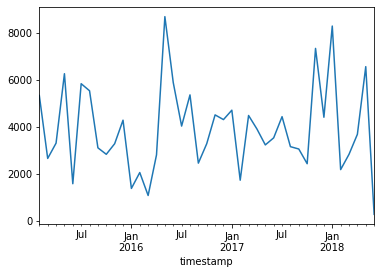

In [118]:
rng = pd.period_range('2015-02-14', '2018-06-01', freq = 'W')

donations.set_index(pd.to_datetime(donations.timestamp), inplace = True) 
donations.sort_index(inplace = True)
donations.groupby(pd.Grouper(freq='M')).amount.sum().plot()

In [119]:
# 택시
def taxi_id_number(num_taxis): 
    arr = np.arange(num_taxis)
    np.random.shuffle(arr)
    
    for i in range(num_taxis):
        yield arr[i]


In [120]:
ids = taxi_id_number(10)


In [121]:
# next는 num_taxis 수 만큼 반복할 수 있음
next(ids)

2

In [122]:
def shift_info():
    start_times_and_freqs = [(0, 8), (8, 30), (16, 15)]
    indices = np.arange(len(start_times_and_freqs)) 
    
    while True:
        idx = np.random.choice(indices,p=[0.25,0.5,0.25]) 
        start = start_times_and_freqs[idx]
        yield (start[0], start[0] + 7.5, start[1]) 

In [123]:
def taxi_process(taxi_id_generator, shift_info_generator):
    taxi_id = next(taxi_id_generator)
    shift_start, shift_end, shift_mean_trips = next(shift_info_generator)
    actual_trips = round(np.random.normal(loc = shift_mean_trips, scale = 2))

    average_trip_time = 6.5 / shift_mean_trips * 60
    between_events_time = 1.0 / (shift_mean_trips - 1) * 60
    time = shift_start
    
    yield TimePoint(taxi_id, 'start shift', time)

    deltaT = np.random.poisson(between_events_time) / 60
    time += deltaT
    
    for i in range(actual_trips):
        yield TimePoint(taxi_id, 'pick up ', time)
        deltaT = np.random.poisson(average_trip_time) / 60
        time += deltaT
        yield TimePoint(taxi_id, 'drop off ', time)
        deltaT = np.random.poisson(between_events_time) / 60
        time += deltaT

    deltaT = np.random.poisson(between_events_time) / 60
    time += deltaT
    yield TimePoint(taxi_id, 'end shift ', time) 


In [162]:
from dataclasses import dataclass

@dataclass
class TimePoint:
    taxi_id: int
    name: str		
    time: float

def __lt__(self, other):

    return self.time < other.time 	

In [163]:
import queue

class Simulator:
    def __init__(self, num_taxis):
        self._time_points = queue.PriorityQueue()

        taxi_id_generator = taxi_id_number(num_taxis)
        shift_info_generator = shift_info()        
        self._taxis = [
            taxi_process(taxi_id_generator, shift_info_generator) for i in range(num_taxis)
        ]

        self._prepare_run()

    def _prepare_run(self): 
        for t in self._taxis:
            while True: 
                try:
                    e = next(t)
                    self._time_points.put(e)
                except:
                    break

    def run(self): 
        sim_time = 0
#         while sim_time < 24:
#         if self._time_points.empty():
#                 break
        p = self._time_points.get()

#             sim_time = p.time
#             print(p) 	


In [164]:
sim = Simulator(100)
sim.run()

TypeError: '<' not supported between instances of 'TimePoint' and 'TimePoint'

### MCMC ? Markov Chain Monte Carlo 
- 확률적으로 쉽게 해결할 수 있는 상황에 난수를 적용하는 방법
- 몬테카를로 시뮬레이션에 마크로프 연쇄를 곁들인 .. 
- 몬테카를로
  - 항(term)의 특정 분포 및 계열의 생김새를 파악 
  - 시간에 따라 그 항들의 변화하는 방식을 파악하기 어려움 
- 마르코프 연쇄 
  - 상태간 관계를 전체 적분하지 않고 단계를 밟는다
  - 적분을 계산하는 것이 아닌 시간에 따른 단계의 시계열을 시뮬레이션 한다 
  - 천이확률(= 전이확률) ? 
    - A였던 상태가 B가 될 확률(조건부 확률?)

In [84]:
# 환경 설정

N = 5 # 격자의 너비
M = 5 # 격자의 높이
temperature = 0.5
BETA = 1 / temperature

In [87]:
def initRandState(N, M):		
    block = np.random.choice([-1, 1], size = (N, M))
    return block

def costForCenterState(state, i, j, n, m):
    centerS = state[i, j]
    neighbors=[((i + 1) % n, j), ((i - 1) % n, j),
               (i, (j + 1) % m), (i, (j - 1) % m)]
    interactionE = [state[x, y] * centerS for (x, y) in neighbors]

    return np.sum(interactionE)

def magnetizationForState(state): 
    return np.sum(state)	

def mcmcAdjust(state):		
    n = state.shape[0] 					
    m = state.shape[1]
    x, y = np.random.randint(0, n), np.random.randint(0, m)
    centerS = state[x, y]
    cost = costForCenterState(state, x, y, n, m)	
    if cost < 0:
        centerS *= -1
    elif np.random.random() < np.exp(-cost * BETA):
        centerS *= -1
    state[x, y] = centerS	
    return state

def runState(state, n_steps, snapsteps = None): 
    if snapsteps is None:
        snapsteps = np.linspace(0, n_steps, 
                     num = round(n_steps / (M * N * 100)), dtype = np.int32)
    saved_states = []
    sp = 0
    magnet_hist = []
    for i in range(n_steps):				
        state = mcmcAdjust(state) 
        magnet_hist.append(magnetizationForState(state)) 
        if sp < len(snapsteps) and i == snapsteps[sp]:
            saved_states.append(np.copy(state))		
            sp += 1
    return state, saved_states, magnet_hist

In [88]:
init_state = initRandState(N, M)
init_state


array([[ 1,  1,  1,  1,  1],
       [-1,  1, -1,  1,  1],
       [ 1,  1, -1,  1, -1],
       [ 1,  1,  1, -1,  1],
       [ 1, -1,  1,  1,  1]])

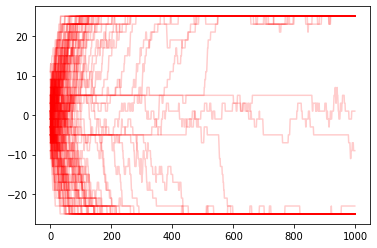

In [89]:
results = []
for i in range(100):
    init_state = initRandState(N, M)
    final_state, states, magnet_hist = runState(init_state, 1000)
    results.append(magnet_hist)

## 겹치는 곡선을 알아볼 수 있게끔 약간의 투명도를 줘서 각 곡선을 그립니다.
for mh in results:
    plt.plot(mh,'r', alpha=0.2)